# Mall data analysis and customer segmentation using clustering algorithm

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
data = pd.read_csv("data.csv"); #read data file
data.head(5)

,CustomerID,Gender,Age,Annual_Income_k,Spending_Score_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

## Data Cleaning

In [4]:
print(list(data.isnull().any()))

[False, False, False, False, False]


In [5]:
data.isnull().values.any()

False

In [6]:
data.isnull().sum()

CustomerID              0
Gender                  0
Age                     0
Annual_Income_k         0
Spending_Score_1_100    0
dtype: int64

In [7]:
data.drop('CustomerID', axis=1, inplace=True)
data.head(2)

,Gender,Age,Annual_Income_k,Spending_Score_1_100
0,Male,19,15,39
1,Male,21,15,81


In [8]:
data.describe()

,Age,Annual_Income_k,Spending_Score_1_100
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
#Checking datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                200 non-null    object
 1   Age                   200 non-null    int64 
 2   Annual_Income_k       200 non-null    int64 
 3   Spending_Score_1_100  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [10]:
#Replacing objects for numerical values
data['Gender'].replace(['Female','Male'], [0,1],inplace=True)
data.Gender.head(5)

0    1
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

## Data analysis

In [11]:
#Male Age 
print('Max  :',max(data[data['Gender']==1].Age))
print('Min  :',min(data[data['Gender']==1].Age))
print('Mean :',np.mean(data[data['Gender']==1].Age))
print('Std  :',np.std(data[data['Gender']==1].Age))

Max  : 70
Min  : 18
Mean : 39.80681818181818
Std  : 15.426407372472942


In [12]:
#Female Age
print('Max  :',max(data[data['Gender']==0].Age))
print('Min  :',min(data[data['Gender']==0].Age))
print('Mean :',np.mean(data[data['Gender']==0].Age))
print('Std  :',np.std(data[data['Gender']==0].Age))

Max  : 68
Min  : 18
Mean : 38.098214285714285
Std  : 12.587522039581053


In [13]:
#Male Income 
print('Max  :',max(data[data['Gender']==1].Annual_Income_k))
print('Min  :',min(data[data['Gender']==1].Annual_Income_k))
print('Mean :',np.mean(data[data['Gender']==1].Annual_Income_k))
print('Std  :',np.std(data[data['Gender']==1].Annual_Income_k))

Max  : 137
Min  : 15
Mean : 62.22727272727273
Std  : 26.486586344758496


In [14]:
#Female Age
print('Max  :',max(data[data['Gender']==0].Annual_Income_k))
print('Min  :',min(data[data['Gender']==0].Annual_Income_k))
print('Mean :',np.mean(data[data['Gender']==0].Annual_Income_k))
print('Std  :',np.std(data[data['Gender']==0].Annual_Income_k))

Max  : 126
Min  : 16
Mean : 59.25
Std  : 25.8955663607278


In [15]:
#Male SpendingScore 
print('Max  :',max(data[data['Gender']==1].Spending_Score_1_100))
print('Min  :',min(data[data['Gender']==1].Spending_Score_1_100))
print('Mean :',np.mean(data[data['Gender']==1].Spending_Score_1_100))
print('Std  :',np.std(data[data['Gender']==1].Spending_Score_1_100))

Max  : 97
Min  : 1
Mean : 48.51136363636363
Std  : 27.737812359739767


In [16]:
#minimun and maximum age of customer
print("Min age :", end= "")
print(min(data.Age))
print("Max age :", end="")
print(max(data.Age))

Min age :18
Max age :70


## Data Visualization

/home/hossain95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hossain95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hossain95/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

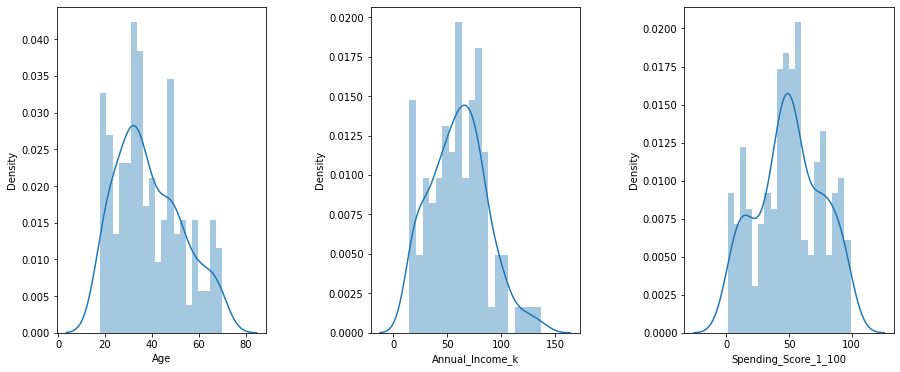

In [17]:
#Density estimation of values using distplot
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual_Income_k', "Spending_Score_1_100"]
feature_listt = ['Age','Annual_Income_k', "Spending_Score_1_100"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data[i], bins=20, kde = True)
    pos = pos + 1
plt.show()

In these histograms we can observe that the distribution of these values resembles a Gaussian distribution, where the vast majority of the values lay in the middle with some exceptions in the extremes.

Now that we have plot the distribution of values through histograms, let's plot the relation between variables using gender as a class distinction. In order to do so we are using the function pairplot given by the Seaborn library, we are using some parameters as well so we can visualize the gender class separation better.

That said, before doing that, let's check how many women and men there are in our data!

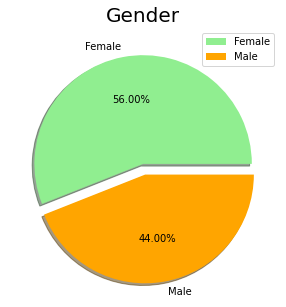

In [18]:
#visualising male and female
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

By looking at the above pie chart which explains about the distribution of Gender in the Mall

Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

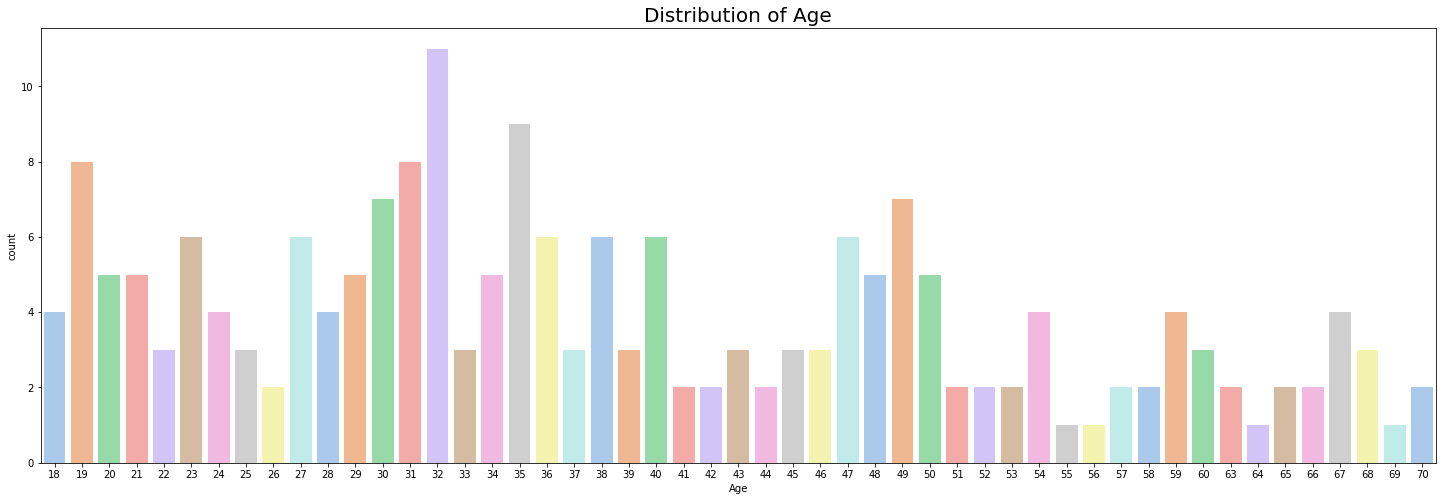

In [19]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=data,palette="pastel")
plt.title('Distribution of Age', fontsize = 20)
plt.show()

This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.

By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

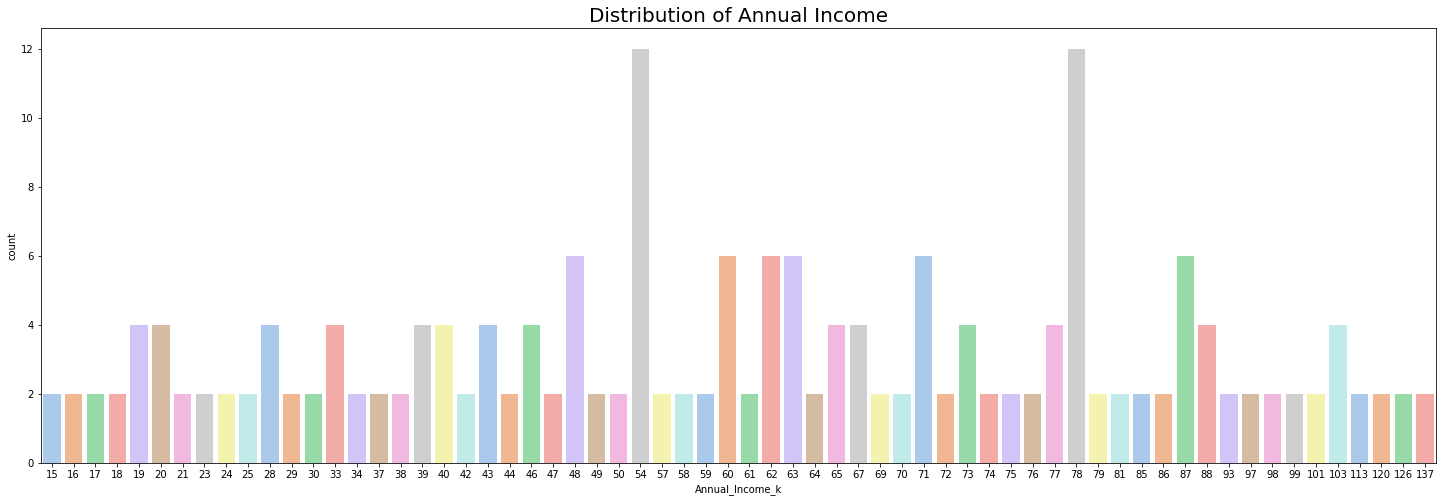

In [20]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Annual_Income_k",data=data,palette="pastel")
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

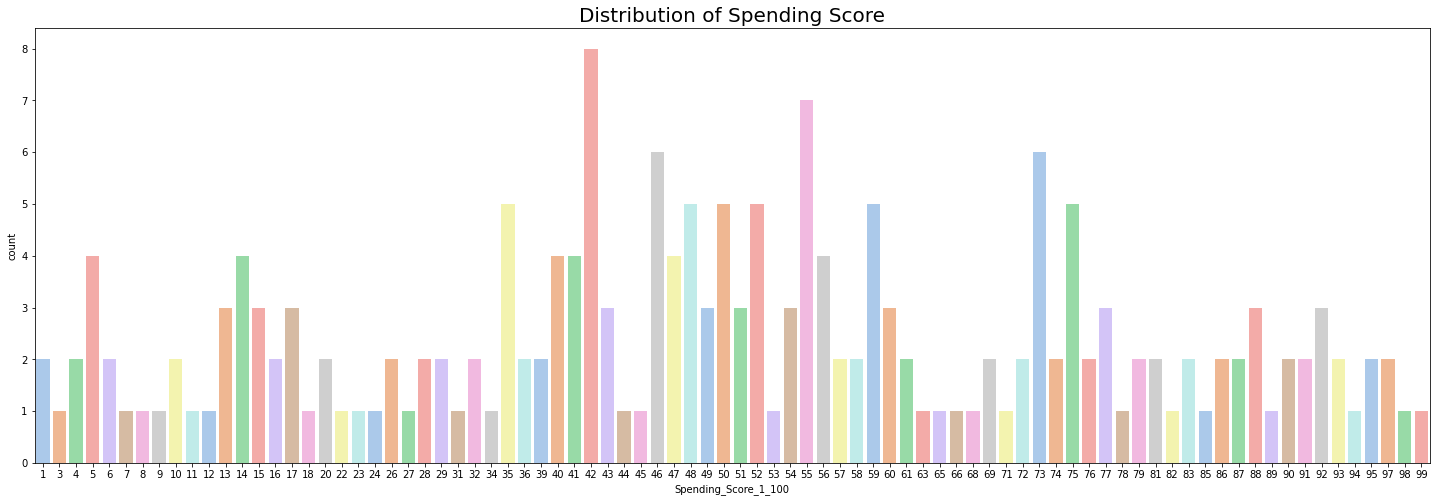

In [21]:
# Visualising the spending score of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Spending_Score_1_100",data=data,palette="pastel")
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.

On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

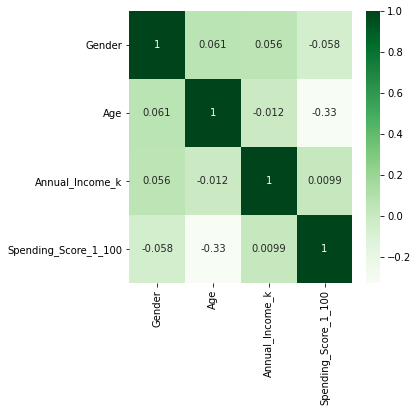

In [22]:
# Finding correaltion between all the parameters in the dataset.
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(),annot=True,cmap="Greens" ,ax=ax)
plt.show()

## Age and Annual Income

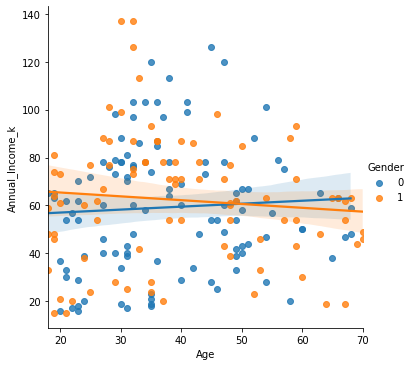

In [23]:
sns.lmplot(x = "Age", y = "Annual_Income_k", data = data, hue = "Gender")

In this graphic we can clearly see how people in their thirties, forties and fifthies tend to earn more money annually than the ones younger than thirty or older than fifty years old. That is to say people whose age lays between thirty and fifty years old seem to get better jobs since they might be better prepared or be already more experienced than younglings or older people. In the graphic we can also see how males tend to earn a little bit more money than females, at least until fifty years old.

## Spending Score and Annual Income

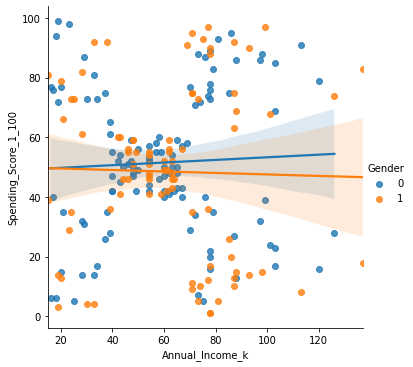

In [24]:
sns.lmplot(x = "Annual_Income_k", y = "Spending_Score_1_100", data = data, hue = "Gender")

Here we can observe how a better annual income leads to having a higher spending score, specially for women. However the correlation between these two variables isn't that big, we seem to find the majority of people in the middle, people who have decent salaries and have a reasonably high spending score.

## Age and Spending Score

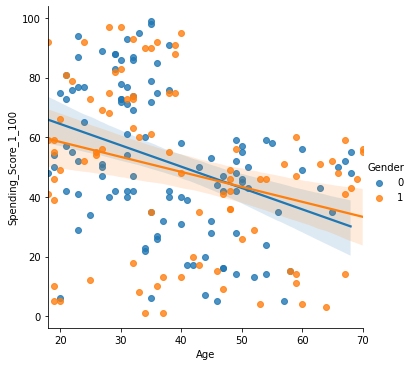

In [25]:
sns.lmplot(x = "Age", y = "Spending_Score_1_100", data = data, hue = "Gender")

In this last graphic we get to see something we could predict, young people tend to spend way more than older people. That can be due to many reasons: young people usually have more free time than old people, shopping malls tend to have shops that target young people such as videogames and tech stores, etc.

## Clustering Analysis

In [26]:
#kmeans clustering
x = data.iloc[:, [2, 3]] #taking annual income and spending score from data

## K-means Clustering

In [27]:
#Using elbow method find the optimal number of clusters
from sklearn.cluster import KMeans

In [28]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

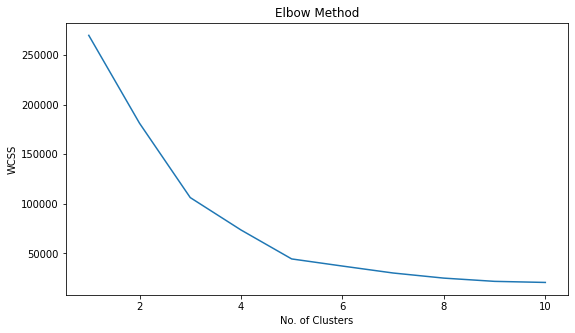

In [29]:
# Visualising elbow method
fig,ax = plt.subplots(figsize=(9,5))
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [30]:
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

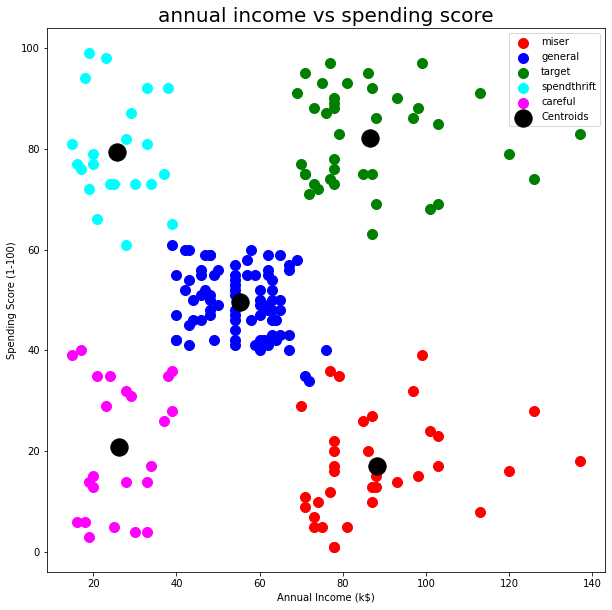

In [31]:
y_kmeans.astype
x=np.array(x)
x.astype
fig = plt.figure(figsize=(10, 10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'target')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'spendthrift')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'careful')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('annual income vs spending score', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift, Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

## k-means clustering age vs spending score

In [32]:
x = data.iloc[:, [1, 3]] #taking age and spending score from data
print(x.head(10))

   Age  Spending_Score_1_100
0   19                    39
1   21                    81
2   20                     6
3   23                    77
4   31                    40
5   22                    76
6   35                     6
7   23                    94
8   64                     3
9   30                    72


In [33]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#### optimal cluster using elbow method

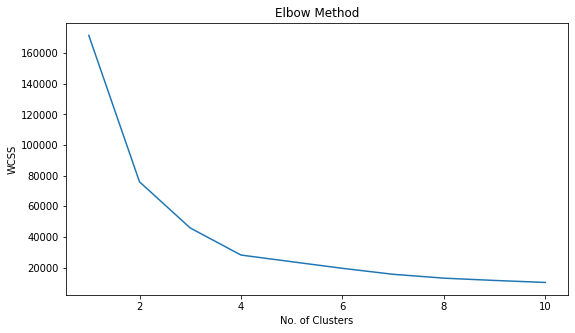

In [34]:
# Visualising elbow method
fig,ax = plt.subplots(figsize=(9,5))
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [35]:
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

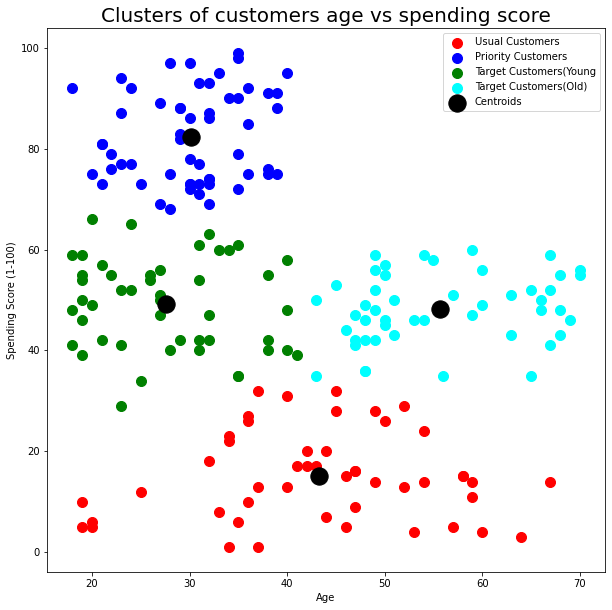

In [36]:
y_kmeans.astype
x=np.array(x)
x.astype
fig = plt.figure(figsize=(10, 10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Usual Customers')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Priority Customers')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target Customers(Young')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Target Customers(Old)')
#plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers age vs spending score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.

## Hierarchial Clustering

In [37]:
newData = data.iloc[:, [2, 3]].values;

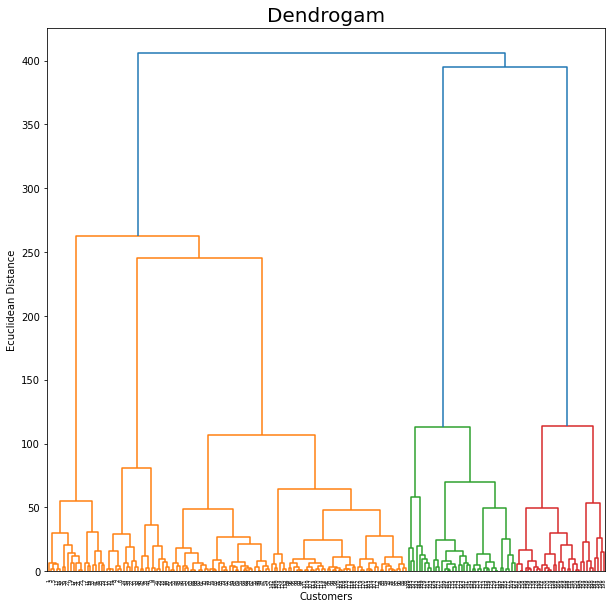

In [38]:
import scipy.cluster.hierarchy as sch
fig,ax = plt.subplots(figsize=(10, 10))
dendrogram = sch.dendrogram(sch.linkage(newData, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

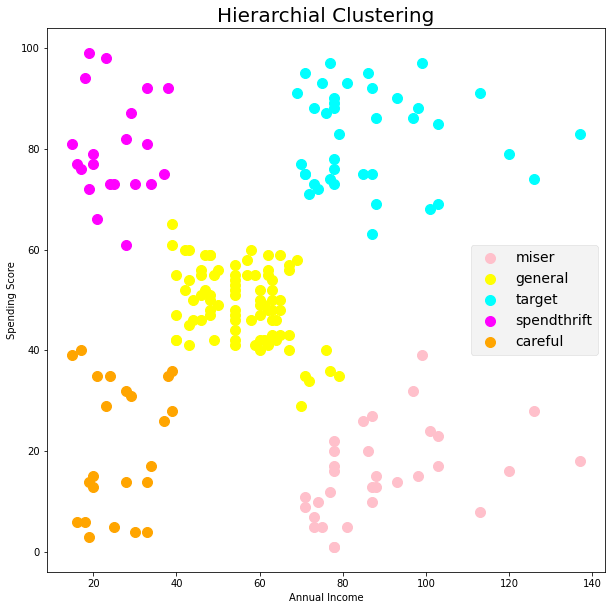

In [39]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(newData)
fig,ax = plt.subplots(figsize=(10, 10))
plt.scatter(newData[y_hc == 0, 0], newData[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(newData[y_hc == 1, 0], newData[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(newData[y_hc == 2, 0], newData[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(newData[y_hc == 3, 0], newData[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(newData[y_hc == 4, 0], newData[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()